In [19]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm
#from numpy import random

In [20]:
# Constantes

D = 0.01
a = 0.2
b = 0.3
e = 0.03

In [21]:
Nx = 50
Nt = 1000
x = np.linspace(0.,1.,Nx)
t = np.linspace(0.,10.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]

lambda_ = D*dt/(dx**2)
print(lambda_)

0.2403403403403404


Se observa que $\lambda < \frac{1}{2}$

In [22]:
u = np.zeros((Nt, Nx))

u[0, :] = np.random.uniform(0., 0.3, len(x))
u[:, 0] = 0.1
u[:, -1] = 0.2

w = np.zeros((Nt, Nx))

In [23]:
def GetSolution():
    for l in range(1, len(t)):
        for  i in range(1,len(x)-1):
            u[l,i] = u[l-1,i] + lambda_*(u[l-1,i+1]-2*u[l-1,i]+u[l-1,i-1]) - dt*u[l-1,i]*(u[l-1,i]-a)*(1-u[l-1,i]) + dt*w[l-1,i]
            w[l,i] = w[l-1,i] + dt*e*(u[l-1,i]-b*w[l-1,i])

In [24]:
GetSolution()

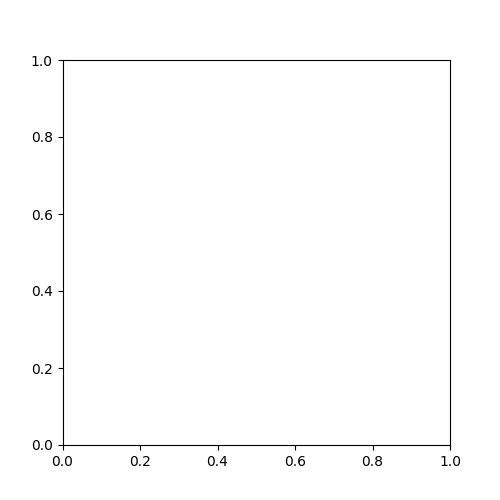

In [25]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    
    ax.clear()
    ax.set_xlim(0,1.)
    ax.set_ylim(0,0.35)
    
def Update(i):
    
    init()
    ax.plot(x,u[i,:],'--', label=r'T(x,%.2f)' %(t[i]))
    ax.plot(x,w[i,:],'--', label=r'T(x,%.2f)' %(t[i]))
    ax.legend()
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [26]:
for i in range(len(t)//4,len(t)):
    max_u = np.max(u[i,:])
    if max_u > 0.3:
        print('T = %.2f' %t[i])
        break

T = 8.35
